# Fundamentals of NLP with Tensorflow

> NLP has the goal of deriving information out of natural languages(could be sequences, texts or speech).

> Another common term for NLP problems is sequences to sequence problems(seq2seq)

## Importing helper functions

In [1]:
!wget https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py

--2022-08-19 11:26:35--  https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19296 (19K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  18.84K  --.-KB/s    in 0.002s  

2022-08-19 11:26:36 (10.3 MB/s) - ‘helper_functions.py’ saved [19296/19296]



In [2]:
from helper_functions import unzip_data, plot_loss_curves, compare_historys, create_data_augmented_layer_for_model, load_and_prep_image, make_confusion_matrix, make_confusion_matrix_for_larger_dataset

## Getting the dataset

> The dataset we are using is the Kaggle's introductionn to NLP dataset(text samples of Tweet labelled as disaster or not disaster).

This is the link of the dataset -> [Kaggle Dataset](https://www.kaggle.com/competitions/nlp-getting-started)

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-08-19 11:26:39--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-08-19 11:26:40 (109 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
unzip_data('nlp_getting_started.zip')

## Visualizing the dataset

In [5]:
import pandas as pd

In [6]:
train= pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')

In [7]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
train['text'][4]

'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '

## Conclusion

* `1` -> Means a disaster(Positive)
* `0` -> Means not a disaster(negative)

## Shuffeling the data

In [9]:
train_shuffled= train.sample(frac= 1, random_state=22)
train_shuffled

,id,keyword,location,text,target
1467,2115,catastrophe,Florida,@deb117 7/30 that catastrophe man opens school...,0
6453,9232,suicide%20bombing,NaN,meek mill should join isis since he loves suic...,0
5698,8131,rescued,Ireland,Three beached whales rescued in Kerry - http:/...,1
5769,8236,riot,Seattle,Southeast Dirt Riot Series Crowns Champions: ...,0
6853,9822,trauma,NaN,Hiroshima: They told me to paint my story: Eig...,1
...,...,...,...,...,...
356,513,army,Studio,But if you build an army of 100 dogs and their...,1
7104,10177,violent%20storm,NaN,I don't understand 'taking' ANY life as a trop...,1
4908,6985,massacre,NaN,@nataliealund \nParents of Colorado theater sh...,1
6276,8967,storm,"Wilmington, NC",New item: Pillow Covers ANY SIZE Pillow Cover ...,0


In [10]:
train_shuffled['text'][1467]

"@deb117 7/30 that catastrophe man opens school w/another he's an athlete not a teacher a principle not fulfilling any inside clerical duties"

### Test dataset

In [11]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Balance of the dataset

In [12]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

## Visualizing the data

In [13]:
import random
random_index= random.randint(0, len(train)-10)
for row in train_shuffled[["text", "target"]][random_index: random_index +10].itertuples():
  _, text, target= row
  print(f"Target: {target}, (real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text: \n{text}\n")
  print("-----\n")

Target: 1, (real disaster)
Text: 
Radioactive Box Quarantined - IsraelÛªs Ashdod Port was evacuated when emergency teams discovered radiation emittin... http://t.co/swQ5lMyDka

-----

(not real disaster)
Text: 
Maybe if the stars align maybe if our worlds collide

-----

Target: 1, (real disaster)
Text: 
the mv should just be them strutting like they mean it while buildings are burning up in the bg and flames everywhere how cool would that be

-----

(not real disaster)
Text: 
Fuck Sleeping With Sirens.

-----

Target: 1, (real disaster)
Text: 
LA Times: Refugio oil spill may have been costlier bigger than projected http://t.co/1ct0pUGZ69

-----

(not real disaster)
Text: 
Its like I never left. I just sunk to the background

-----

(not real disaster)
Text: 
Gut Deutsch musik! The old and rotten the monarchy has collapsed. The new may live. Long live the German Republic! https://t.co/RJjU70rHyu

-----

(not real disaster)
Text: 
sticks and stones may break my bones
but words will nev

## Creating Validation dataset from test dataset

In [14]:
len(train_shuffled), len(test)

(7613, 3263)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_sentences, val_sentences, train_labels, val_labels= train_test_split(train_shuffled['text'].to_numpy(), train_shuffled['target'].to_numpy(), test_size=0.1, random_state=22)

In [17]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [18]:
6851 + 762

7613

In [19]:
train_sentences[:10], train_labels[:10]

(array(["RT @GreenHarvard: Documenting climate change's first major casualty http://t.co/4q4zd7oU34 via @GreenHarvard",
        '#Colorado #News Motorcyclist bicyclist injured in Denver collision on Broadway: At least two people were tak... http://t.co/2iAFPmqJeP',
        "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU",
        'HURRICANE GUILLERMO LIVE NOAA TRACKING / LOOPING WED.AUG.5TH ~ http://t.co/RjopJKbydR ~  http://t.co/NUFDgw9YEv http://t.co/2oKSCwYoHC',
        '@morehouse64 It appears our #Govt has lost an #Ethical and or moral relevance. This means the whole #USA population is in danger from them.',
        'Hijacking Electric Skateboards to Make Them SaferåÊ | @scoopit http://t.co/ihInj3eNQi',
        '@bre_morrow neither of them even smoke so I dk what was going on lol',
        'Ahrar Al Sham: In our negotiations with Iran over Al Zabadani they wanted all Sunnis evacuated out of A


## Converting text into numbers

> When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

* Tokenziation - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)



### Text Vectorization(Tokenization)

**Docs** -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

## Error With `TextVectorization`

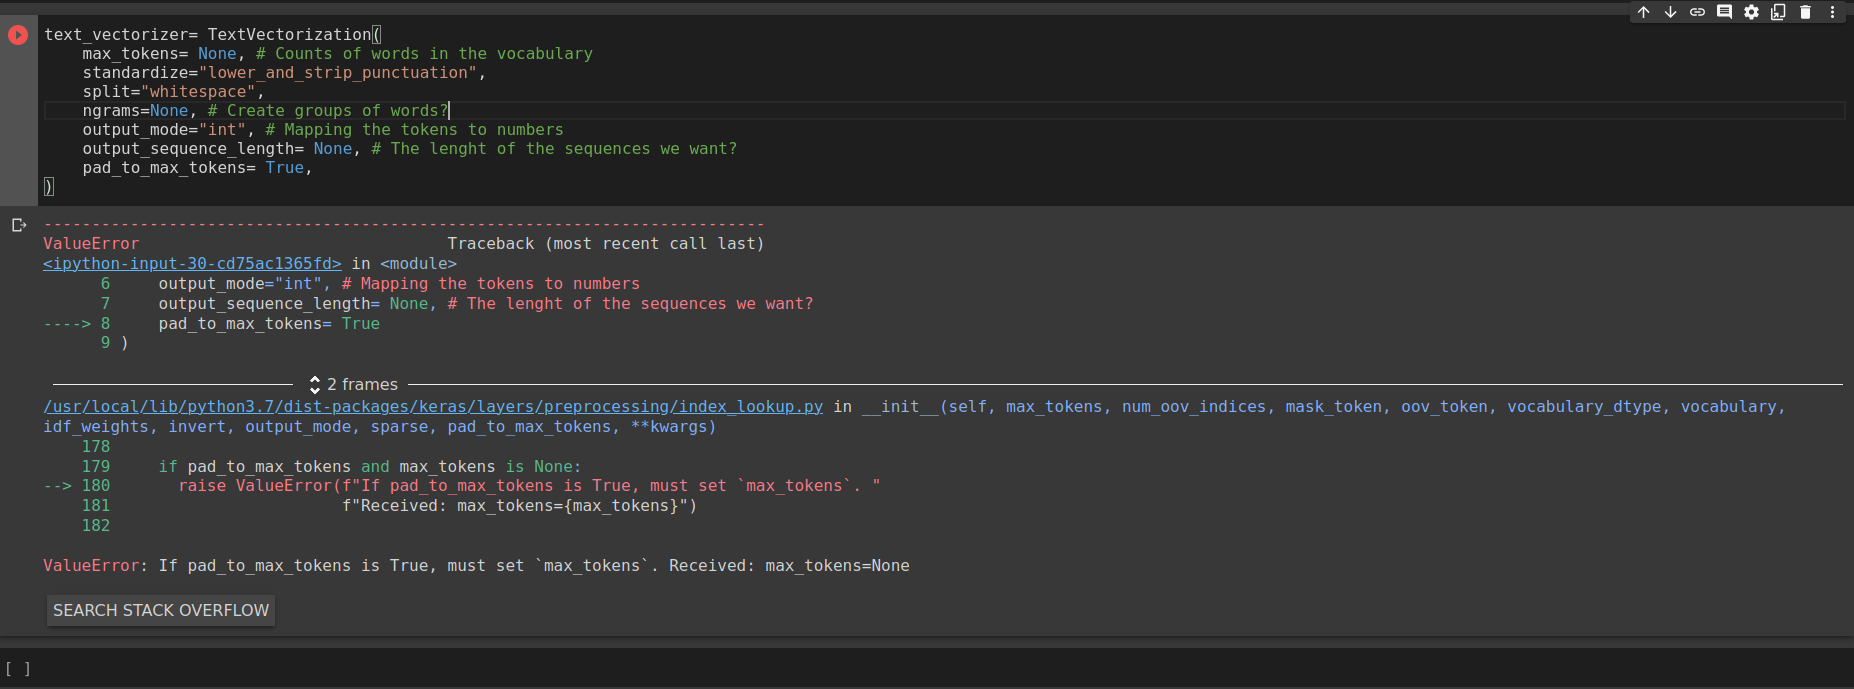

In [21]:
text_vectorizer= TextVectorization(
    max_tokens= 10000, # Counts of words in the vocabulary
    standardize="lower_and_strip_punctuation",  
    split="whitespace", 
    ngrams=None, # Create groups of words?
    output_mode="int", # Mapping the tokens to numbers
    output_sequence_length= None, # The lenght of the sequences we want?
    pad_to_max_tokens= True,
)

In [22]:
text_vectorizer

### Average number of tokens(words) in the training tweets

In [23]:
avg= round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
avg

15

In [24]:
max_vocab_length= 10000 # Max. number of words to have in our vocabulary
max_length= avg # Max. length our sequences will be.

text_vectorizer= TextVectorization(
    max_tokens= max_vocab_length,
    output_mode= "int",
    output_sequence_length= max_length,
)

## Mapping `TextVectorization` to text data and turning it into numbers

In [25]:
train_sentences

array(["RT @GreenHarvard: Documenting climate change's first major casualty http://t.co/4q4zd7oU34 via @GreenHarvard",
       '#Colorado #News Motorcyclist bicyclist injured in Denver collision on Broadway: At least two people were tak... http://t.co/2iAFPmqJeP',
       "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU",
       ...,
       "'the fallacy is it is up to the steam roller. It's up to the object whether it will be flattened or not.' #RobertCalifornia #thereisonlysex",
       'The Pak terrorist who has been caught alive must be tried fast not delayed as KasabWe must send very hard message to Pak instead of Biryani',
       "For those that were interested in the gun powder art discussed at the end of 'Introduction to Theological Aesthetic' http://t.co/BZ3iR4GMWj"],
      dtype=object)

In [26]:
text_vectorizer.adapt(train_sentences)

## Sample Sentence and tokenize it

In [28]:
sample_sentence= 'There is a hurrican coming towards my city'
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  76,    9,    3,    1,  222, 2644,   13,  185,    0,    0,    0,
           0,    0,    0,    0]])>

## Choosing random sentences from training data

In [32]:
random_sentence= random.choice(train_sentences)
print(f"Original: {random_sentence}\n")
vectorized_sentence= text_vectorizer([random_sentence])
print(f"Vectorized: {vectorized_sentence}")

Original: @Bonn1eGreer The Angel of History propelled into the future by the winds of progress leaves in its wake piles of death and destruction. WB

Vectorized: [[   1    2 1939    6  703 9568   66    2 1418   18    2 1086    6 2034
  3686]]


## Unique words in the vocabulary

In [37]:
common_words= text_vectorizer.get_vocabulary()
common_words

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'are',
 'be',
 'was',
 'have',
 'like',
 'me',
 'up',
 'but',
 'so',
 'just',
 'as',
 'amp',
 'im',
 'not',
 'your',
 'out',
 'its',
 'after',
 'an',
 'will',
 'all',
 'no',
 'fire',
 'has',
 'when',
 'if',
 'we',
 'get',
 'now',
 'new',
 'via',
 'more',
 'or',
 'about',
 'they',
 'people',
 'dont',
 'what',
 'news',
 'he',
 'over',
 'one',
 'how',
 'been',
 'who',
 'into',
 'were',
 'can',
 'video',
 'do',
 'us',
 'emergency',
 '2',
 'disaster',
 'than',
 'there',
 'would',
 'police',
 'his',
 'her',
 'still',
 'some',
 'burning',
 'body',
 'back',
 'off',
 'california',
 'crash',
 'buildings',
 'why',
 'storm',
 'day',
 'time',
 'know',
 'man',
 'them',
 'suicide',
 'rt',
 'going',
 'had',
 'got',
 'first',
 'see',
 'nuclear',
 'world',
 'two',
 'our',
 'cant',
 'bomb',
 '3',
 'fires',
 'youtube',
 'attack',
 'love',
 'go',
 'd

In [40]:
len(common_words)

10000

### Top 5 Words

In [38]:
common_words[:5]

['', '[UNK]', 'the', 'a', 'in']

### Least 5 Words

In [39]:
common_words[-5:]

['paramedics', 'paraguay', 'paradise', 'parade', 'paracord']

## Creating embedding using an Embedding layer

> Tensorflow Embedding Layer -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

> Embedding layer parameters

* `input_dim` -> Size of the vocabulary
* `output_dim` -> Size of the output embedding vector, Eg: a value of `100`, means each token gets represented by a vector of `100` long.
* `input_length` -> Length of the sequences being passed to the embedding layer.

In [41]:
from tensorflow.keras import layers

embedding= layers.Embedding(input_dim= max_vocab_length, # Input Shape
                            output_dim=128, # Output Shape
                            input_length= max_length # How long is each input
                            )

In [42]:
embedding

In [44]:
random_sentence= random.choice(train_sentences)
print(f"Original: {random_sentence}\n")

embedded= embedding(text_vectorizer([random_sentence]))
embedded

Original: Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/EdEKrmqTpQ



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02350669,  0.00884739, -0.03249055, ...,  0.04522594,
         -0.04019711,  0.04983225],
        [ 0.03965782, -0.03588497, -0.01018245, ..., -0.00822866,
         -0.04585283,  0.01165288],
        [-0.01235497, -0.0321592 ,  0.03664665, ..., -0.03942619,
         -0.00785625, -0.01590389],
        ...,
        [-0.00959309,  0.00267967, -0.03767848, ...,  0.04244604,
         -0.00140735,  0.03762947],
        [-0.04022698,  0.04069127,  0.03573433, ...,  0.00286172,
         -0.01392185, -0.03520637],
        [ 0.0161231 , -0.04355462,  0.0022895 , ...,  0.03389793,
         -0.04161862,  0.0490695 ]]], dtype=float32)>

### Single Token's embeddings

In [46]:
embedded[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.02350669,  0.00884739, -0.03249055, -0.00484242,  0.02693403,
       -0.00584713, -0.0117095 , -0.0156327 ,  0.03399577, -0.01247381,
       -0.00131816, -0.01587787, -0.04058516, -0.02136149,  0.0079459 ,
       -0.04098753,  0.01090102,  0.00066993,  0.03982634, -0.04134456,
       -0.03673321,  0.00912421,  0.04138507, -0.00969311, -0.03838383,
        0.0031046 , -0.0453478 , -0.0189119 ,  0.01120437,  0.00133965,
       -0.02281597,  0.0092706 ,  0.04225754, -0.04449829,  0.01854632,
       -0.01265658, -0.00026617,  0.04605723, -0.01138154, -0.01674452,
       -0.01383339, -0.00762446,  0.01930643,  0.00985718, -0.02054976,
        0.04335118, -0.03216865,  0.04014117, -0.04099343, -0.00763378,
        0.04707465, -0.01747148,  0.03745438,  0.00086944,  0.01182308,
        0.01538284, -0.02683595,  0.02419809, -0.04812625,  0.03351678,
        0.04113184, -0.04538784,  0.03548265,  0.02057287,  0.04840181,
       -0.015150

In [47]:
embedded[0][0].shape

TensorShape([128])

In [48]:
random_sentence[0]

'W'

## Conclusion

> Text vectorization or tokenization is converting words to some numerical format. `Creating an embedding` is just making a straight mapping in numerical format that is learnable by the model.

## Modelling on the text dataset

### Experiments

* Naive Bayes(Baseline), Normal ML model
* Feed-Forward Neural Network(Dense model)
* LSTM model(RNN)
* GRU model(RNN)
* Bidirectional-LSTM model(RNN)
* 1D Convolutional Neural Network(CNN)
* Tensorflow Hub pretrained Feature Extractor(Transfer learning in NLP)
* Transfer Learning but with only 10% of the data

### Modelling steps:

* Create a model
* Build a model
* Fit a model
* Evaluate the model

## Naive Bayes Model(Baseline)

> It is a common practice to use non-DL algorithms as a baseline because of their speed and later use DL algorithms to improve upon them.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [51]:
model_0= Pipeline([
    ("tfidf", TfidfVectorizer()), # Converts words into numbers using tfidf
    ("clf", MultinomialNB()) # Model the text
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

## Evaluate the model

In [53]:
baseline_score= model_0.score(val_sentences, val_labels)
print(f"The score of the naive bayes model: {baseline_score}")

The score of the naive bayes model: 0.8333333333333334


## Making predictions

In [54]:
baseline_preds= model_0.predict(val_sentences)
baseline_preds

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [55]:
train_labels

array([1, 1, 1, ..., 0, 1, 0])

## Predicting the model

In [59]:
from helper_functions import calculate_results, make_confusion_matrix

In [58]:
baseline_result= calculate_results(val_labels, baseline_preds)
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

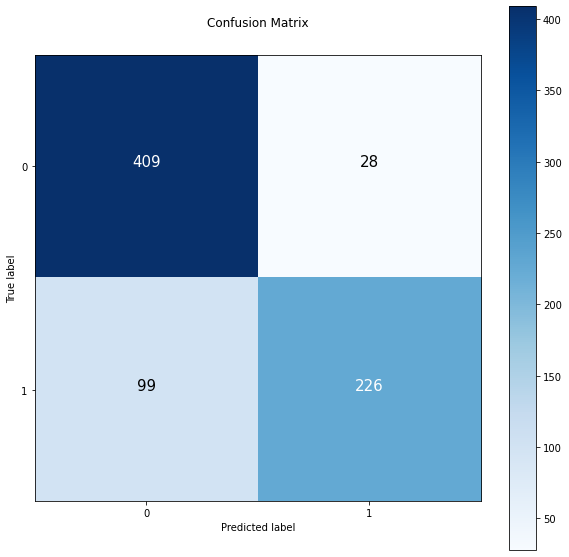

In [60]:
make_confusion_matrix(val_labels, baseline_preds)

In [63]:
409 + 28

437

In [64]:
99 + 206

305

## A simple Dense Model

### Tensorflow Callback

In [65]:
from helper_functions import create_tensorboard_callback

SAVE_DIR='model_logs'

### Model Building

In [69]:
from tensorflow.keras import layers
inputs= layers.Input(shape=(1,), dtype= tf.string) # Inputs are 1-dimensional string
x= text_vectorizer(inputs) # Converting the string into numbers
x= embedding(x) # Create an embedding of the numberized inputs
x= layers.GlobalAveragePooling1D(name="global_avrage_pooling")(x) # Condense the feature vector for each token to one vector
outputs= layers.Dense(1, activation="sigmoid")(x) # Create an output layer, and it is a binary classification model
model_1= tf.keras.Model(inputs, outputs, name="model_1_dense")

In [70]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avrage_pooling (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [71]:
model_1.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer= tf.keras.optimizers.Adam())

In [72]:
history_1 = model_1.fit(train_sentences,
                        train_labels, 
                        epochs=10,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220819-140652
Epoch 1/10
215/215 [==============================] - 5s 19ms/step - loss: 0.6167 - accuracy: 0.6906 - val_loss: 0.5125 - val_accuracy: 0.8031
Epoch 2/10
215/215 [==============================] - 4s 18ms/step - loss: 0.4476 - accuracy: 0.8133 - val_loss: 0.4331 - val_accuracy: 0.8241
Epoch 3/10
215/215 [==============================] - 4s 18ms/step - loss: 0.3505 - accuracy: 0.8602 - val_loss: 0.4183 - val_accuracy: 0.8320
Epoch 4/10
215/215 [==============================] - 4s 17ms/step - loss: 0.2873 - accuracy: 0.8889 - val_loss: 0.4320 - val_accuracy: 0.8320
Epoch 5/10
215/215 [==============================] - 5s 21ms/step - loss: 0.2392 - accuracy: 0.9113 - val_loss: 0.4402 - val_accuracy: 0.8255
Epoch 6/10
215/215 [==============================] - 5s 21ms/step - loss: 0.2023 - accuracy: 0.9264 - val_loss: 0.4688 - val_accuracy: 0.8228
Epoch 7/10
215/215 [==============================] - 6s 29ms/step -

In [79]:
model_1_score=model_1.evaluate(val_sentences, val_labels)
model_1_score

24/24 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.8005


[0.5979138612747192, 0.8005249500274658]

In [78]:
baseline_score

0.8333333333333334

In [80]:
model_1_pred_probs= model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [81]:
model_1_pred_probs[:5]

array([[9.9996316e-01],
       [1.0890636e-01],
       [5.1888436e-02],
       [9.2029279e-01],
       [6.2360108e-05]], dtype=float32)

### Converting model prediction probabilites to label format

In [83]:
model_1_preds= tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [85]:
val_labels[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

## Evaluating the model

In [86]:
model_1_results= calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 80.0524934383202,
 'precision': 0.8001272134833142,
 'recall': 0.800524934383202,
 'f1': 0.8002757313438585}

In [88]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

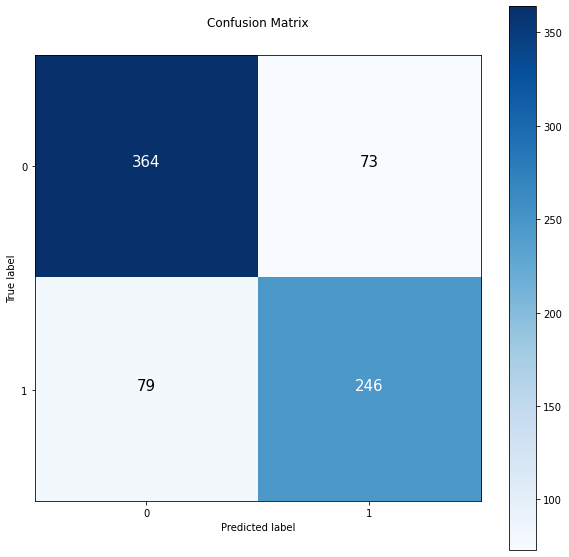

In [89]:
make_confusion_matrix(val_labels, model_1_preds)